### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

#### 2.1

In [2]:
df = pd.read_csv("week2.csv")
df["Date"] = pd.to_datetime(df["Date"])
print(df["Date"].dtypes)
df.set_index(['Date'], inplace=True)
df

datetime64[ns]


,Year,Month,Unnamed: 2,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month.1,Year.1,vwap,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,
2019-10-24,2019,10,0,1780.78,"1,770.78","1,787.97","1,760.78",5200000.0,10,2019,1780.780000,0.000000,Slight or No change
2019-10-23,2019,10,1,1762.17,"1,761.30","1,770.05","1,742.00",2190000.0,10,2019,1775.264993,-1.045048,Negative
2019-10-22,2019,10,2,1765.73,"1,788.15","1,789.78","1,762.00",2230000.0,10,2019,1773.054699,0.202024,Slight or No change
2019-10-21,2019,10,3,1785.66,"1,769.66","1,785.88","1,765.00",2220000.0,10,2019,1775.418193,1.128712,Positive
2019-10-18,2019,10,4,1757.51,"1,787.80","1,793.98","1,749.20",3370000.0,10,2019,1771.450368,-1.576448,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,2017,10,498,1105.28,"1,109.00","1,110.54","1,101.12",3480000.0,10,2017,1105.280000,0.144970,Slight or No change
2017-10-30,2017,10,499,1110.85,"1,095.01","1,122.79","1,093.56",6610000.0,10,2017,1108.928930,0.503945,Slight positive
2017-10-27,2017,10,500,1100.95,"1,058.14","1,105.58","1,050.55",16570000.0,10,2017,1103.969782,-0.891209,Slight negative


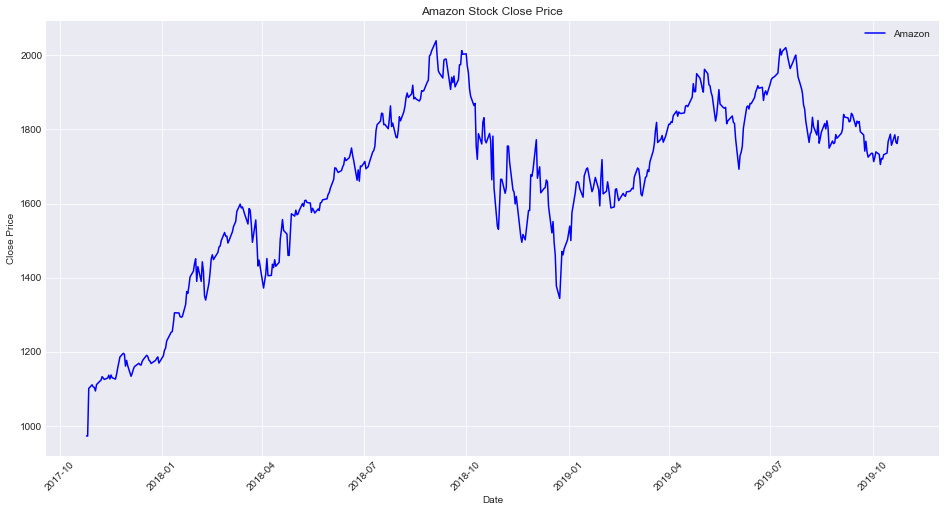

In [3]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(16, 8))
plt.plot(df.index, df["Close Price"], color='b', label="Amazon")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.title("Amazon Stock Close Price")
plt.show()

#### 2.2

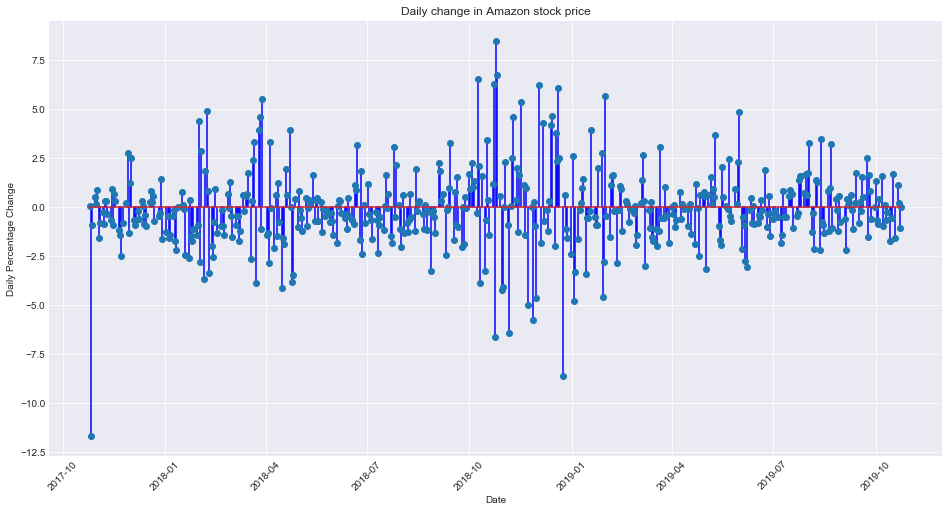

In [4]:
plt.figure(figsize=(16, 8))
plt.stem(df.index, df.Day_Perc_Change, 'b')
plt.xlabel("Date")
plt.title("Daily change in Amazon stock price")
plt.ylabel("Daily Percentage Change")
plt.xticks(rotation=45)
plt.show()

#### 2.3

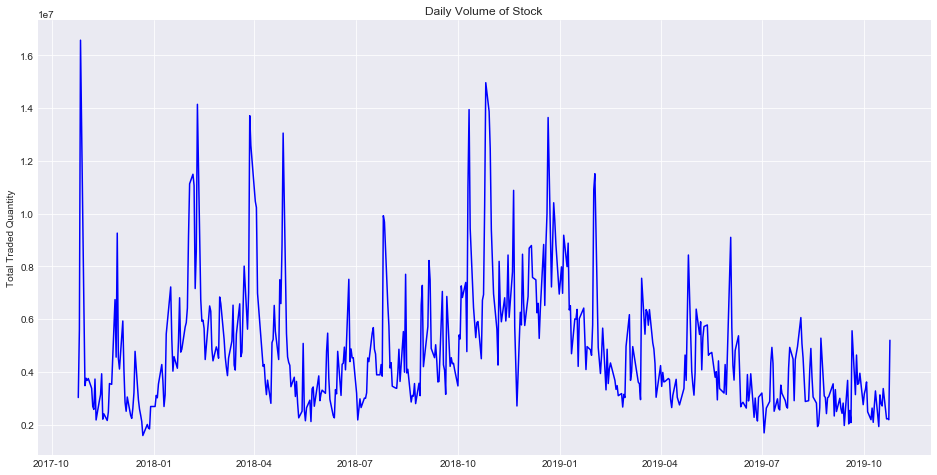

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df["Total Traded Quantity"], color='b')
plt.ylabel("Total Traded Quantity")
plt.title("Daily Volume of Stock")
plt.show()

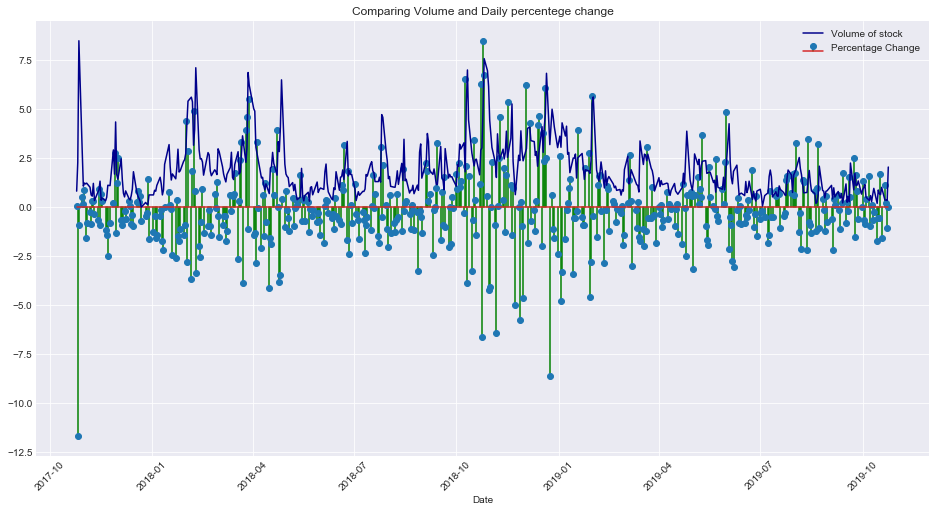

In [6]:
scale_trade = df["Total Traded Quantity"] - df["Total Traded Quantity"].min()
scale_trade = scale_trade/scale_trade.max() * df.Day_Perc_Change.max()
plt.figure(figsize=(16, 8))
plt.stem(df.index, df.Day_Perc_Change, 'g', label="Percentage Change")
plt.plot(df.index, scale_trade,  'darkblue',  label="Volume of stock")
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.title("Comparing Volume and Daily percentege change")
plt.show()

#### 2.4

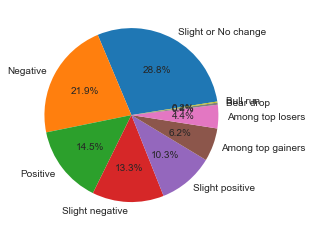

In [7]:
labels = df.Trend.unique()
vc = df.Trend.value_counts()
plt.pie(vc, labels=labels, startangle=9, autopct='%.1f%%')
plt.show()

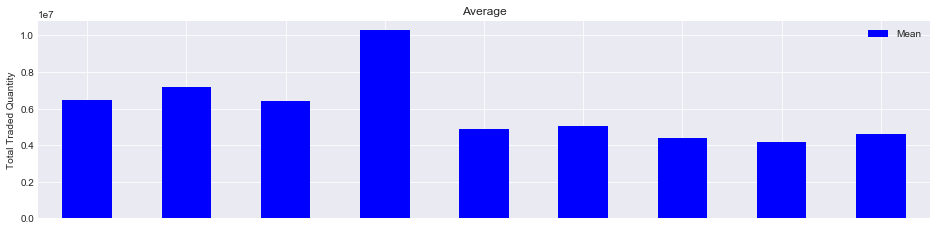

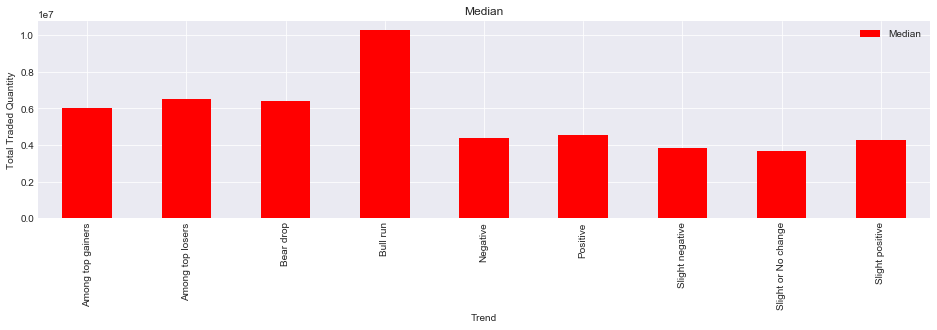

In [8]:
avg = df.groupby(df.Trend)['Total Traded Quantity'].mean()
median = df.groupby(df.Trend)['Total Traded Quantity'].median()
plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)
plt.title("Average")
avg.plot.bar(color='blue', label="Mean").label_outer()
plt.ylabel("Total Traded Quantity")
plt.legend()
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2, 1, 2)
plt.title("Median")
median.plot.bar(color='red', label="Median")
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Total Traded Quantity")
plt.show()

#### 2.5

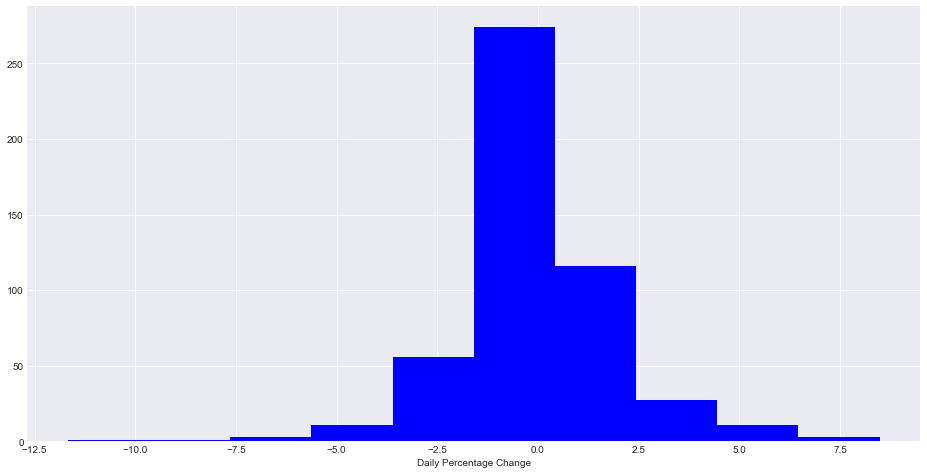

In [9]:
plt.figure(figsize=(16, 8))
plt.hist(df["Day_Perc_Change"], color='b')
plt.xlabel("Daily Percentage Change")
plt.show()

#### 2.6

In [30]:
jublfood = pd.read_csv("JUBLFOOD.csv", index_col="Date")
godrej = pd.read_csv("GODREJIND.csv", index_col="Date")
maruti = pd.read_csv("MARUTI.csv", index_col="Date")
pvr = pd.read_csv("PVR.csv", index_col="Date")
tcs = pd.read_csv("TCS.csv", index_col="Date")
print(jublfood.shape)
print(godrej.shape)
print(maruti.shape)
print(pvr.shape)
print(tcs.shape)

(495, 14)
(494, 14)
(496, 14)
(495, 14)
(498, 14)


In [31]:
jublfood = jublfood[jublfood.Series == "EQ"]
godrej = godrej[godrej.Series == "EQ"]
maruti = maruti[maruti.Series == "EQ"]
pvr = pvr[pvr.Series == "EQ"]
tcs = tcs[tcs.Series == "EQ"]
jublfood.reset_index(inplace=True)
godrej.reset_index(inplace=True)
maruti.reset_index(inplace=True)
pvr.reset_index(inplace=True)
tcs.reset_index(inplace=True)
date = maruti.index
print(jublfood.shape)
print(godrej.shape)
print(maruti.shape)
print(pvr.shape)
print(tcs.shape)

(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)


In [32]:
df1 = pd.concat([jublfood["Close Price"], godrej["Close Price"], maruti["Close Price"], pvr["Close Price"], tcs["Close Price"]], axis=1, join='inner', keys=['JUBLFOOD', 'GODREJIND', 'MARUTI', 'PVR', 'TCS'])
df1

,JUBLFOOD,GODREJIND,MARUTI,PVR,TCS
0,1025.45,578.55,6823.90,1524.95,2365.10
1,1050.65,584.80,6953.95,1539.00,2429.15
2,1049.05,588.60,6958.20,1530.30,2455.35
3,1019.35,574.60,6831.05,1515.05,2536.20
4,1018.10,578.00,6790.55,1513.55,2507.15
...,...,...,...,...,...
489,1282.25,484.30,6702.00,1780.10,2151.95
490,1262.45,476.10,6650.15,1748.50,2152.85
491,1268.80,471.30,6624.95,1758.45,2172.55
492,1264.50,471.20,6631.60,1715.40,2135.80


In [33]:
new_df = df1.pct_change().fillna(0)*100
new_df

,JUBLFOOD,GODREJIND,MARUTI,PVR,TCS
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.457458,1.080287,1.905802,0.921342,2.708131
2,-0.152287,0.649795,0.061116,-0.565302,1.078567
3,-2.831133,-2.378525,-1.827340,-0.996537,3.292810
4,-0.122627,0.591716,-0.592881,-0.099007,-1.145414
...,...,...,...,...,...
489,-1.354002,-3.937320,-0.114015,-1.231759,-0.273420
490,-1.544161,-1.693165,-0.773650,-1.775181,0.041823
491,0.502990,-1.008192,-0.378939,0.569059,0.915066
492,-0.338903,-0.021218,0.100378,-2.448179,-1.691561


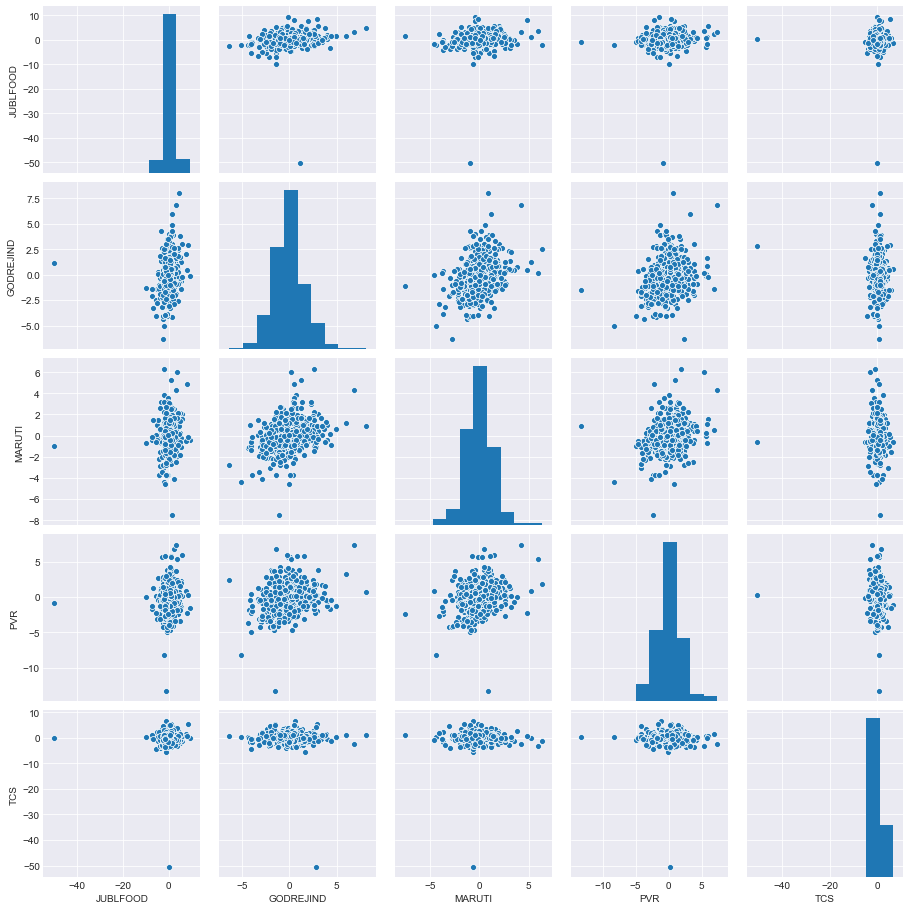

In [34]:
sb.pairplot(new_df)
plt.show()

#### 2.7

In [35]:
roll = new_df.rolling(7, min_periods=1).std().fillna(0)
print(roll)

JUBLFOOD  GODREJIND    MARUTI       PVR       TCS
0    0.000000   0.000000  0.000000  0.000000  0.000000
1    1.737685   0.763878  1.347605  0.651487  1.914938
2    1.464756   0.543841  1.083103  0.750394  1.363376
3    2.160898   1.542889  1.524261  0.828445  1.506654
4    1.871397   1.378053  1.349574  0.717975  1.844529
..        ...        ...       ...       ...       ...
489  1.399733   1.728257  1.101921  1.433545  2.024204
490  1.346764   1.711732  1.026505  1.689962  2.003651
491  1.220701   1.580804  1.013900  1.692360  1.838077
492  1.225286   1.525978  0.398105  1.519138  1.778267
493  0.888247   1.837844  0.584917  1.185554  1.701184

[494 rows x 5 columns]


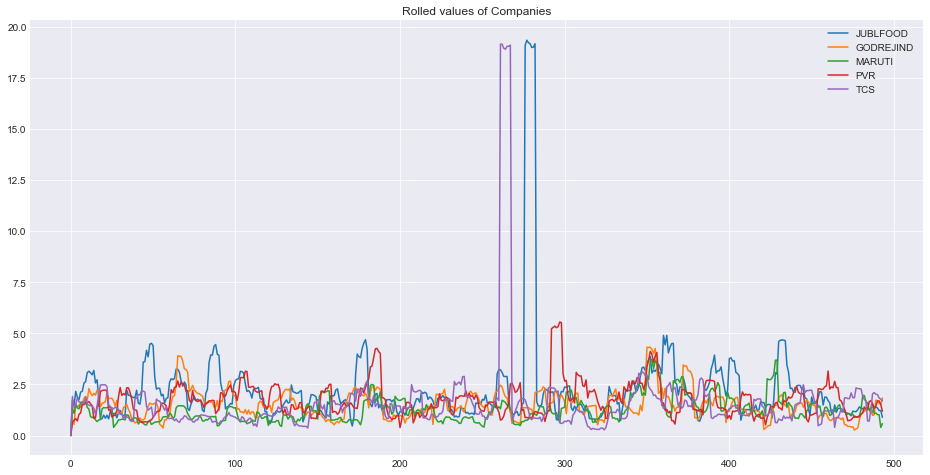

In [36]:
plt.figure(figsize=(16, 8))
plt.title("Rolled values of Companies")
plt.plot(roll)
plt.legend(["JUBLFOOD", "GODREJIND", "MARUTI", "PVR", "TCS"])
plt.show()

#### 2.8

In [37]:
nifty = pd.read_csv("Nifty50.csv")
nifty_close = nifty["Close"]
nifty_close_rolling = nifty_close.pct_change().fillna(0)*100
nifty_close_rolling = nifty_close_rolling.rolling(7, min_periods=1).std().fillna(0)
nifty_close_rolling

0      0.000000
1      0.500456
2      0.374437
3      0.715672
4      0.619882
         ...   
489    0.666354
490    0.740837
491    0.460459
492    0.436348
493    0.447439
Name: Close, Length: 494, dtype: float64

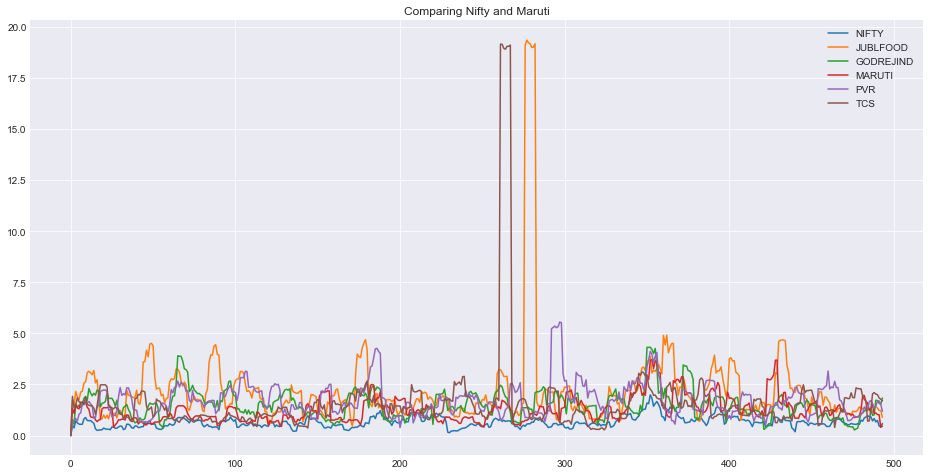

In [38]:
plt.figure(figsize=(16, 8))
plt.title("Comparing Nifty and Maruti")
plt.plot(nifty_close_rolling)
plt.plot(roll)
plt.legend(["NIFTY", "JUBLFOOD", "GODREJIND", "MARUTI", "PVR", "TCS"])
plt.show()

#### 2.9

In [39]:
short_window = 21
long_window = 34
maruti_roll_21 = df1["MARUTI"].rolling(short_window, min_periods=1).mean().fillna(0)
maruti_roll_34 = df1["MARUTI"].rolling(long_window, min_periods=1).mean().fillna(0)
signals = pd.DataFrame(index=date)
signals["signal"] = 0
signals["signal"][short_window:] = np.where(maruti_roll_21[short_window:] > maruti_roll_34[short_window:], 1, 0)
signals['Positions'] = signals["signal"].diff().fillna(0)
signals["Short_mavg"] = maruti_roll_21.tolist()
signals["Long_mavg"] = maruti_roll_34.tolist()
signals 

,signal,Positions,Short_mavg,Long_mavg
0,0,0.0,6823.900000,6823.900000
1,0,0.0,6888.925000,6888.925000
2,0,0.0,6912.016667,6912.016667
3,0,0.0,6891.775000,6891.775000
4,0,0.0,6871.530000,6871.530000
...,...,...,...,...
489,1,0.0,7058.166667,6940.525000
490,1,0.0,7038.035714,6927.697059
491,1,0.0,7014.790476,6914.195588
492,1,0.0,6992.119048,6906.033824


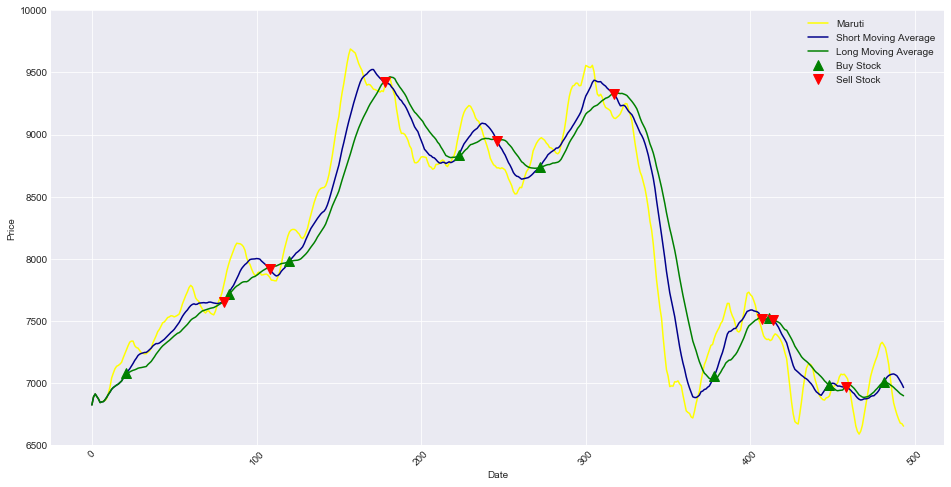

In [40]:
plt.figure(figsize=(16, 8))
plt.plot(date, df1["MARUTI"].rolling(7, min_periods=1).mean().fillna(0), color="yellow", label="Maruti")
plt.plot(date, maruti_roll_21, color="darkblue", label="Short Moving Average")
plt.plot(date, maruti_roll_34, color="green", label="Long Moving Average")
plt.plot(signals.loc[signals.Positions == 1].index, signals["Short_mavg"][signals.Positions == 1], '^', markersize=10, color='g', label="Buy Stock")
plt.plot(signals.loc[signals.Positions == -1].index, signals["Short_mavg"][signals.Positions == -1], 'v', markersize=10, color='r', label="Sell Stock")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.ylim(6500, 10000)
plt.xticks(rotation=45)
plt.show()

#### 2.10

In [45]:
maruti_roll_14 = df1.MARUTI.rolling(14, min_periods=1).mean().fillna(0)
maruti_std_14 = df1.MARUTI.rolling(14, min_periods=1).std().fillna(0)
upper = maruti_roll_14 + 2*maruti_std_14
lower = maruti_roll_14 - 2*maruti_std_14
maruti['Upper Bound'] = upper
maruti['Lower Bound'] = lower
maruti['Average'] = maruti_roll_14
maruti

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Upper Bound,Lower Bound,Average
0,15-May-2017,MARUTI,EQ,6730.20,6759.4,6839.10,6733.45,6824.00,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,6823.900000,6823.900000,6823.900000
1,16-May-2017,MARUTI,EQ,6823.90,6850.0,6977.55,6830.00,6968.40,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,7072.843474,6705.006526,6888.925000
2,17-May-2017,MARUTI,EQ,6953.95,6950.0,6979.00,6885.85,6945.00,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,7064.698373,6759.334961,6912.016667
3,18-May-2017,MARUTI,EQ,6958.20,6918.3,6948.00,6814.45,6822.00,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,7040.424711,6743.125289,6891.775000
4,19-May-2017,MARUTI,EQ,6831.05,6854.8,6893.90,6691.55,6756.30,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,7028.914094,6714.145906,6871.530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,07-May-2019,MARUTI,EQ,6709.65,6744.9,6785.25,6680.00,6693.00,6702.00,6737.56,586684,3.952821e+09,69696,198757,33.88,7636.878670,6392.778472,7014.828571
490,08-May-2019,MARUTI,EQ,6702.00,6679.0,6693.00,6616.00,6650.00,6650.15,6655.70,552749,3.678929e+09,59897,228920,41.41,7585.199648,6345.500352,6965.350000
491,09-May-2019,MARUTI,EQ,6650.15,6637.0,6678.00,6600.00,6609.85,6624.95,6646.86,570000,3.788710e+09,71334,257451,45.17,7515.141609,6311.622677,6913.382143
492,10-May-2019,MARUTI,EQ,6624.95,6623.0,6664.90,6575.00,6630.00,6631.60,6622.41,608669,4.030855e+09,75423,247688,40.69,7383.528216,6325.100356,6854.314286


In [46]:
maruti.to_csv('Maruti_updated.csv')

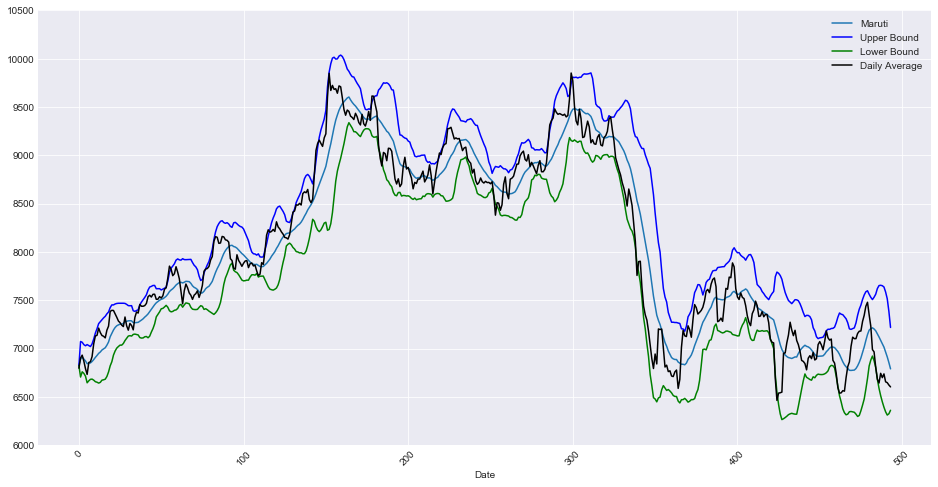

In [43]:
plt.figure(figsize=(16, 8))
plt.plot(date, maruti_roll_14, label="Maruti")
plt.plot(date, upper, color='blue', label="Upper Bound")
plt.plot(date, lower, color='green', label="Lower Bound")
plt.plot(date, maruti['Average Price'], color='black', label="Daily Average")
# plt.fill_between(date, upper, lower, color='grey', alpha='10')
plt.xlabel("Date")
plt.ylim(6000, 10500)
plt.legend()
plt.xticks(rotation=45)
plt.show()